In [1]:
%matplotlib notebook
import pyam
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler


In [2]:
df = pyam.IamDataFrame('./data/study_data.xlsx')
df.variables()

pyam.utils - INFO: Reading `./data/study_data.xlsx`
pyam.core - INFO: Importing metadata for 58 scenarios (for total of 58)


0                                        Emissions|CO2
1    AR5 climate diagnostics|Temperature|Global Mea...
Name: variable, dtype: object

In [3]:
# Rename the temperature variable for convenience
df['variable'] = (
    df['variable']
    .map(
        lambda x: x.replace('AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|MED', 'Temperature')
    ).astype(str)
)

### Q1. Plot out median and interquartile range

1. Plot it out (do not forget legends, axis labels etc.)

<IPython.core.display.Javascript object>


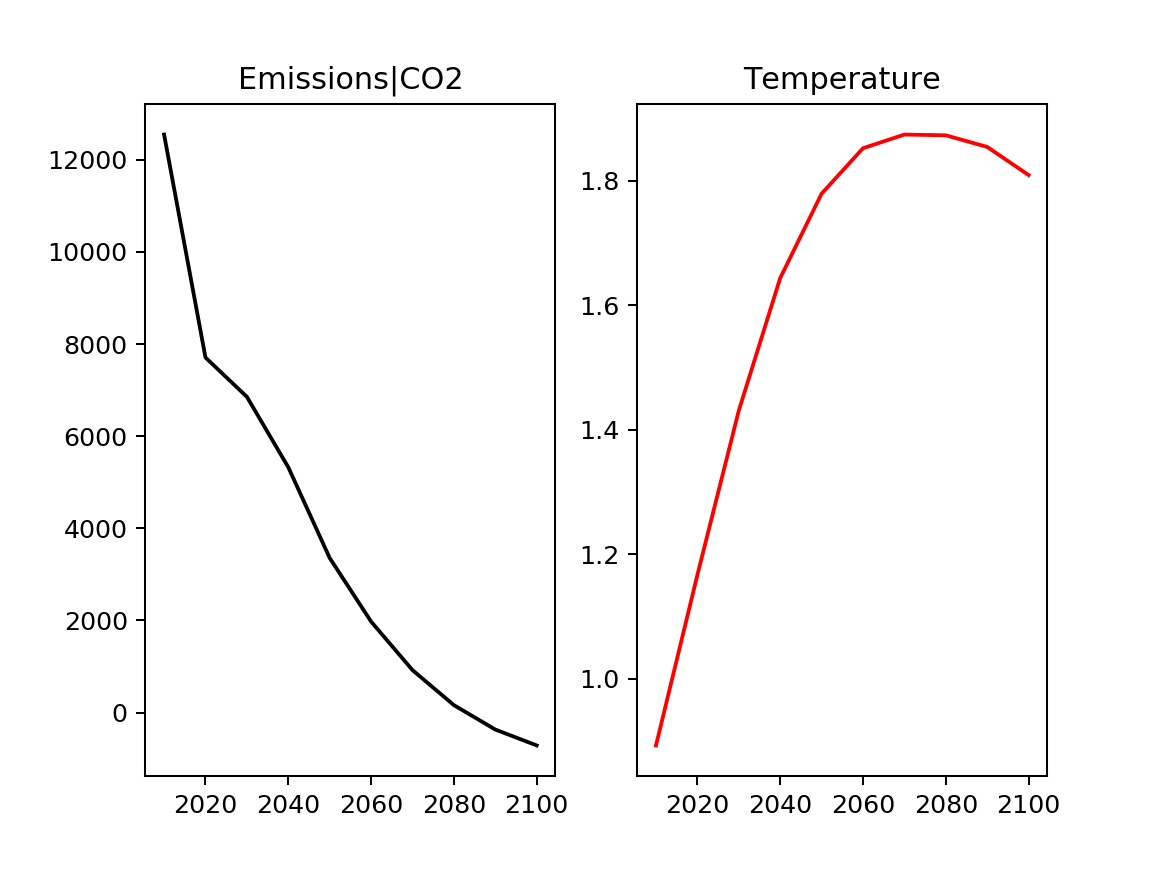

In [4]:
fig, ax = plt.subplots(1,2)

In [5]:
vars_of_interest = [
    ('Emissions|CO2','#000000'),
    ('Temperature','#FF0000')
]
years = range(2010,2110,10)
i = 0

In [6]:
for var, col in vars_of_interest:
    _df = (
        df
        .filter(variable = var, year = years)
        .timeseries()
    )
    _med = _df.apply(lambda x: np.median(x))
    ax[i].plot(years, _med, color = col)
    ax[i].set_title(var)
    i += 1

### Q2. Calculate the sum of emissions for the 10 year time steps between 2020 and 2100

In [7]:
emi = (
    df
    .filter(variable='Emissions|CO2')
    .timeseries()
)

In [8]:
cum_emi = pd.DataFrame()
cum_emi[2100] = emi.apply(pyam.cumulative, raw=False, axis=1, first_year=2020, last_year=2100)

In [9]:
df_emi = pyam.IamDataFrame(cum_emi)
df_emi['variable'] = (
    df_emi['variable']
    .map(
        lambda x: x.replace('Emissions|CO2','Cumulative Emissions|CO2')
    ).astype(str)
)

In [10]:
df = df.append(df_emi)

### Q3. Scatter plot of cumulative emissions versus temperature outcome

<IPython.core.display.Javascript object>


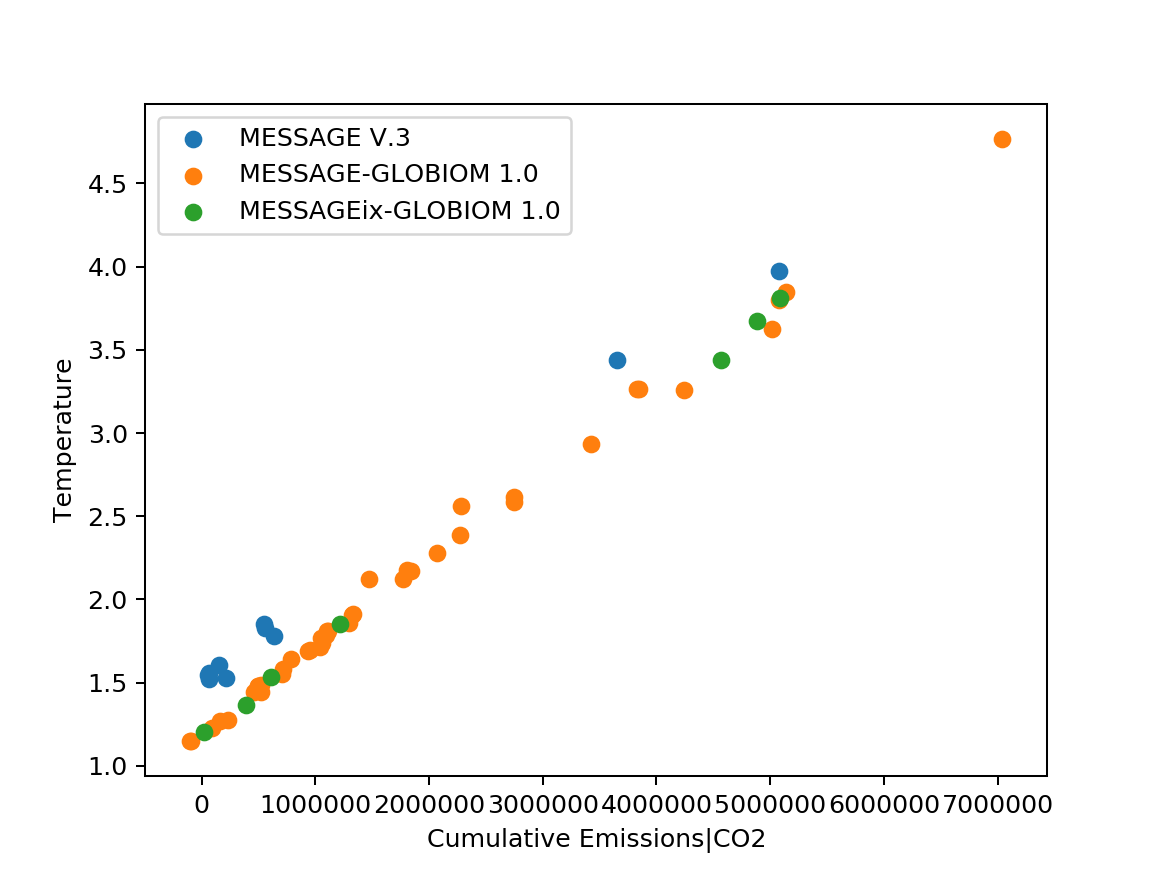

In [11]:
(
df
.scatter(x = 'Cumulative Emissions|CO2',
        y = 'Temperature',
        color = 'model')
)